In [1]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('data/chronic_kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.drop('id', axis=1, inplace=True)
df.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
80,74.0,80.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,132.0,...,31,9400,3.8,yes,yes,no,good,no,no,ckd
93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,295.0,...,30,7000,3.2,yes,yes,yes,poor,no,no,ckd
176,21.0,90.0,1.010,4.0,0.0,normal,abnormal,present,present,107.0,...,23,12400,3.9,no,no,no,good,no,yes,ckd
107,55.0,100.0,1.015,1.0,4.0,normal,NaN,notpresent,notpresent,297.0,...,34,13600,4.4,yes,yes,no,good,no,no,ckd
61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,182.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,98.0,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
64,55.0,80.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,146.0,...,NaN,NaN,NaN,no,no,\tno,good,no,no,ckd
282,20.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,123.0,...,44,5500,4.8,no,no,no,good,no,no,notckd
53,62.0,80.0,1.015,0.0,5.0,NaN,NaN,notpresent,notpresent,246.0,...,40,8500,4.7,yes,yes,no,good,no,no,ckd
388,51.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,94.0,...,46,9500,6.4,no,no,no,good,no,no,notckd


In [5]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [7]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [8]:
df.sample(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
124,65.0,100.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,90.0,...,28.0,5500.0,3.6,yes,no,no,good,no,no,ckd
41,45.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
152,39.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,32.0,NaN,NaN,no,yes,no,good,no,no,ckd
93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,295.0,...,30.0,7000.0,3.2,yes,yes,yes,poor,no,no,ckd


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [10]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [11]:
for col in cat_cols:
    print(f'{col} {df[col].unique()}')

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
peda_edema ['no' 'yes' nan]
aanemia ['no' 'yes' nan]
class ['ckd' 'ckd\t' 'notckd']


In [12]:
df['diabetes_mellitus'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].str.replace('\tno', 'no')
df['class'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'}, inplace=True)
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [13]:
cols = ['diabetes_mellitus','coronary_artery_disease','class']

for col in cols:
    print(f'{col} {df[col].unique()}')

diabetes_mellitus ['yes' 'no' nan]
coronary_artery_disease ['no' 'yes' nan]
class [0 1]


In [14]:
value_counts = df['class'].value_counts()
categories = value_counts.index
categories = categories.map({0: 'ckd', 1: 'not ckd'})
counts = value_counts.values 

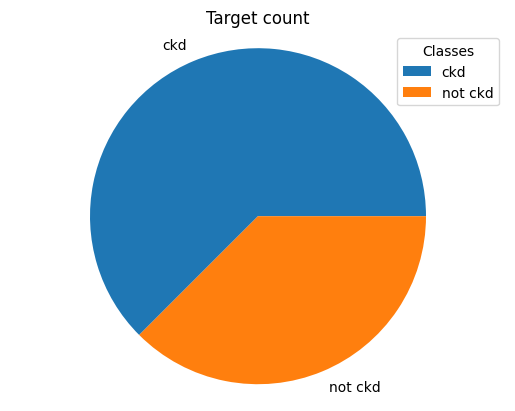

In [15]:
plt.pie(counts, labels=categories)
plt.axis('equal')
plt.title('Target count')
plt.legend(categories, title='Classes', loc='best')
plt.show()

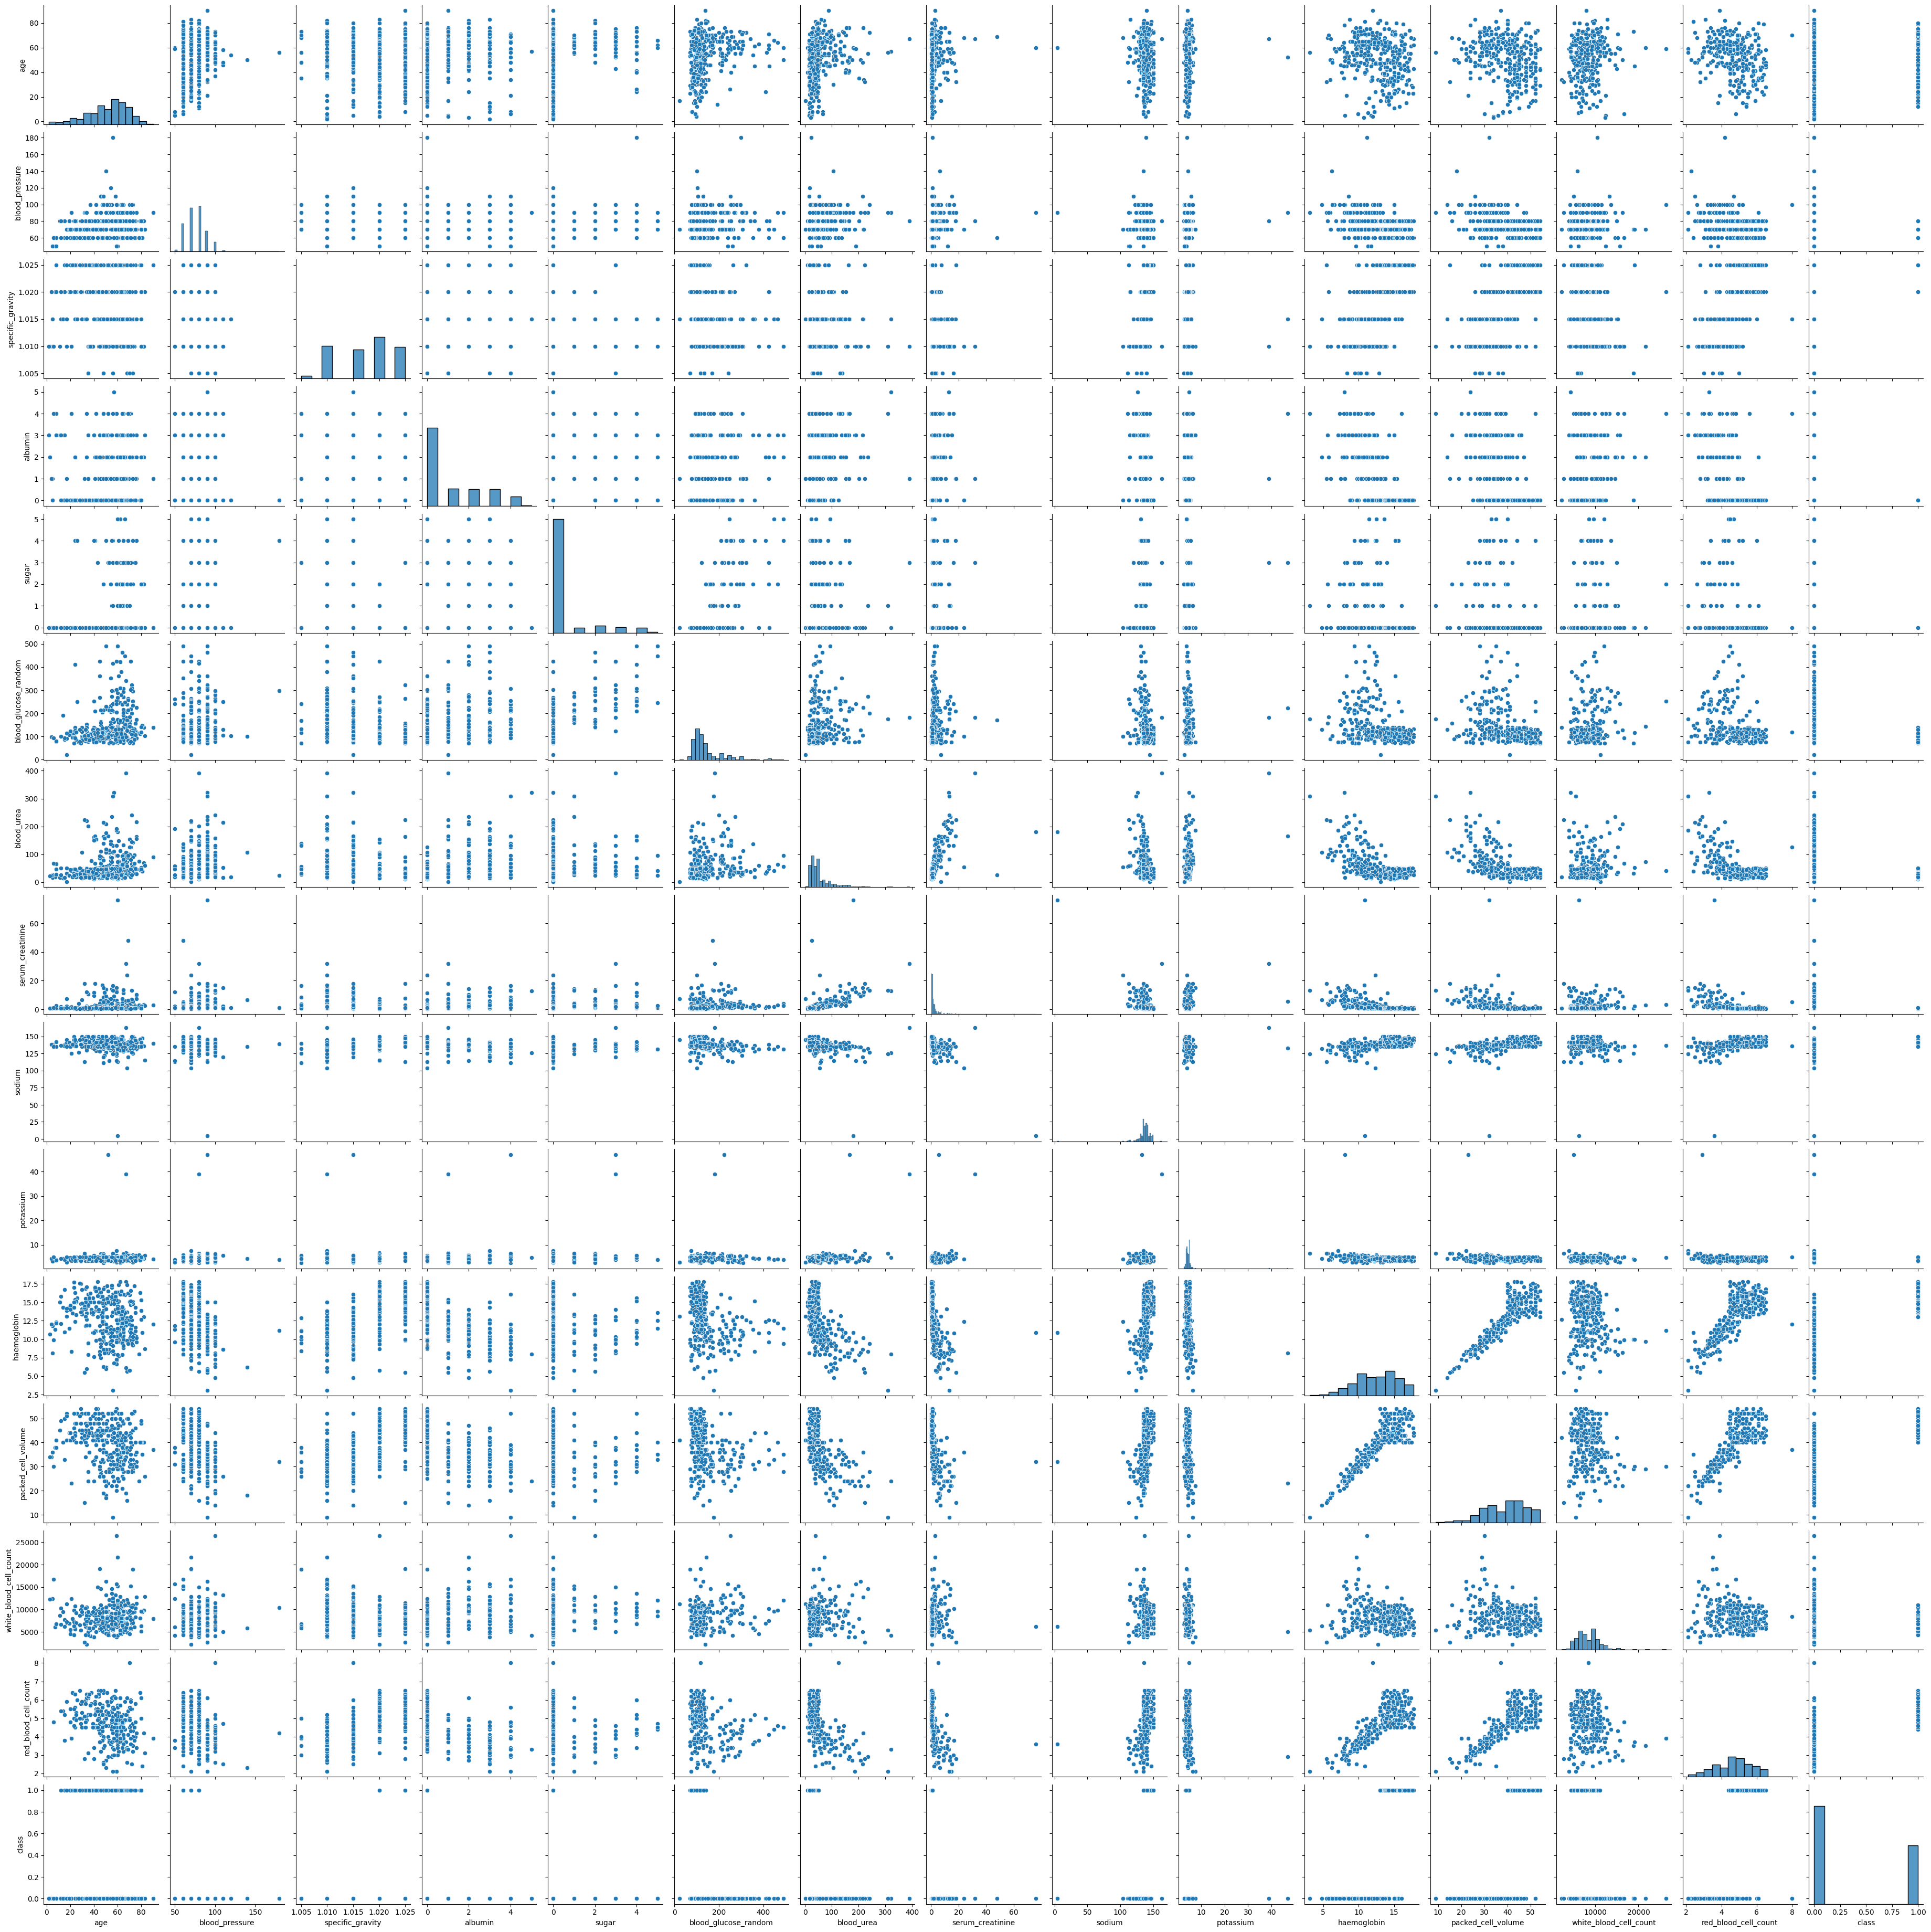

In [16]:
sb.pairplot(df)

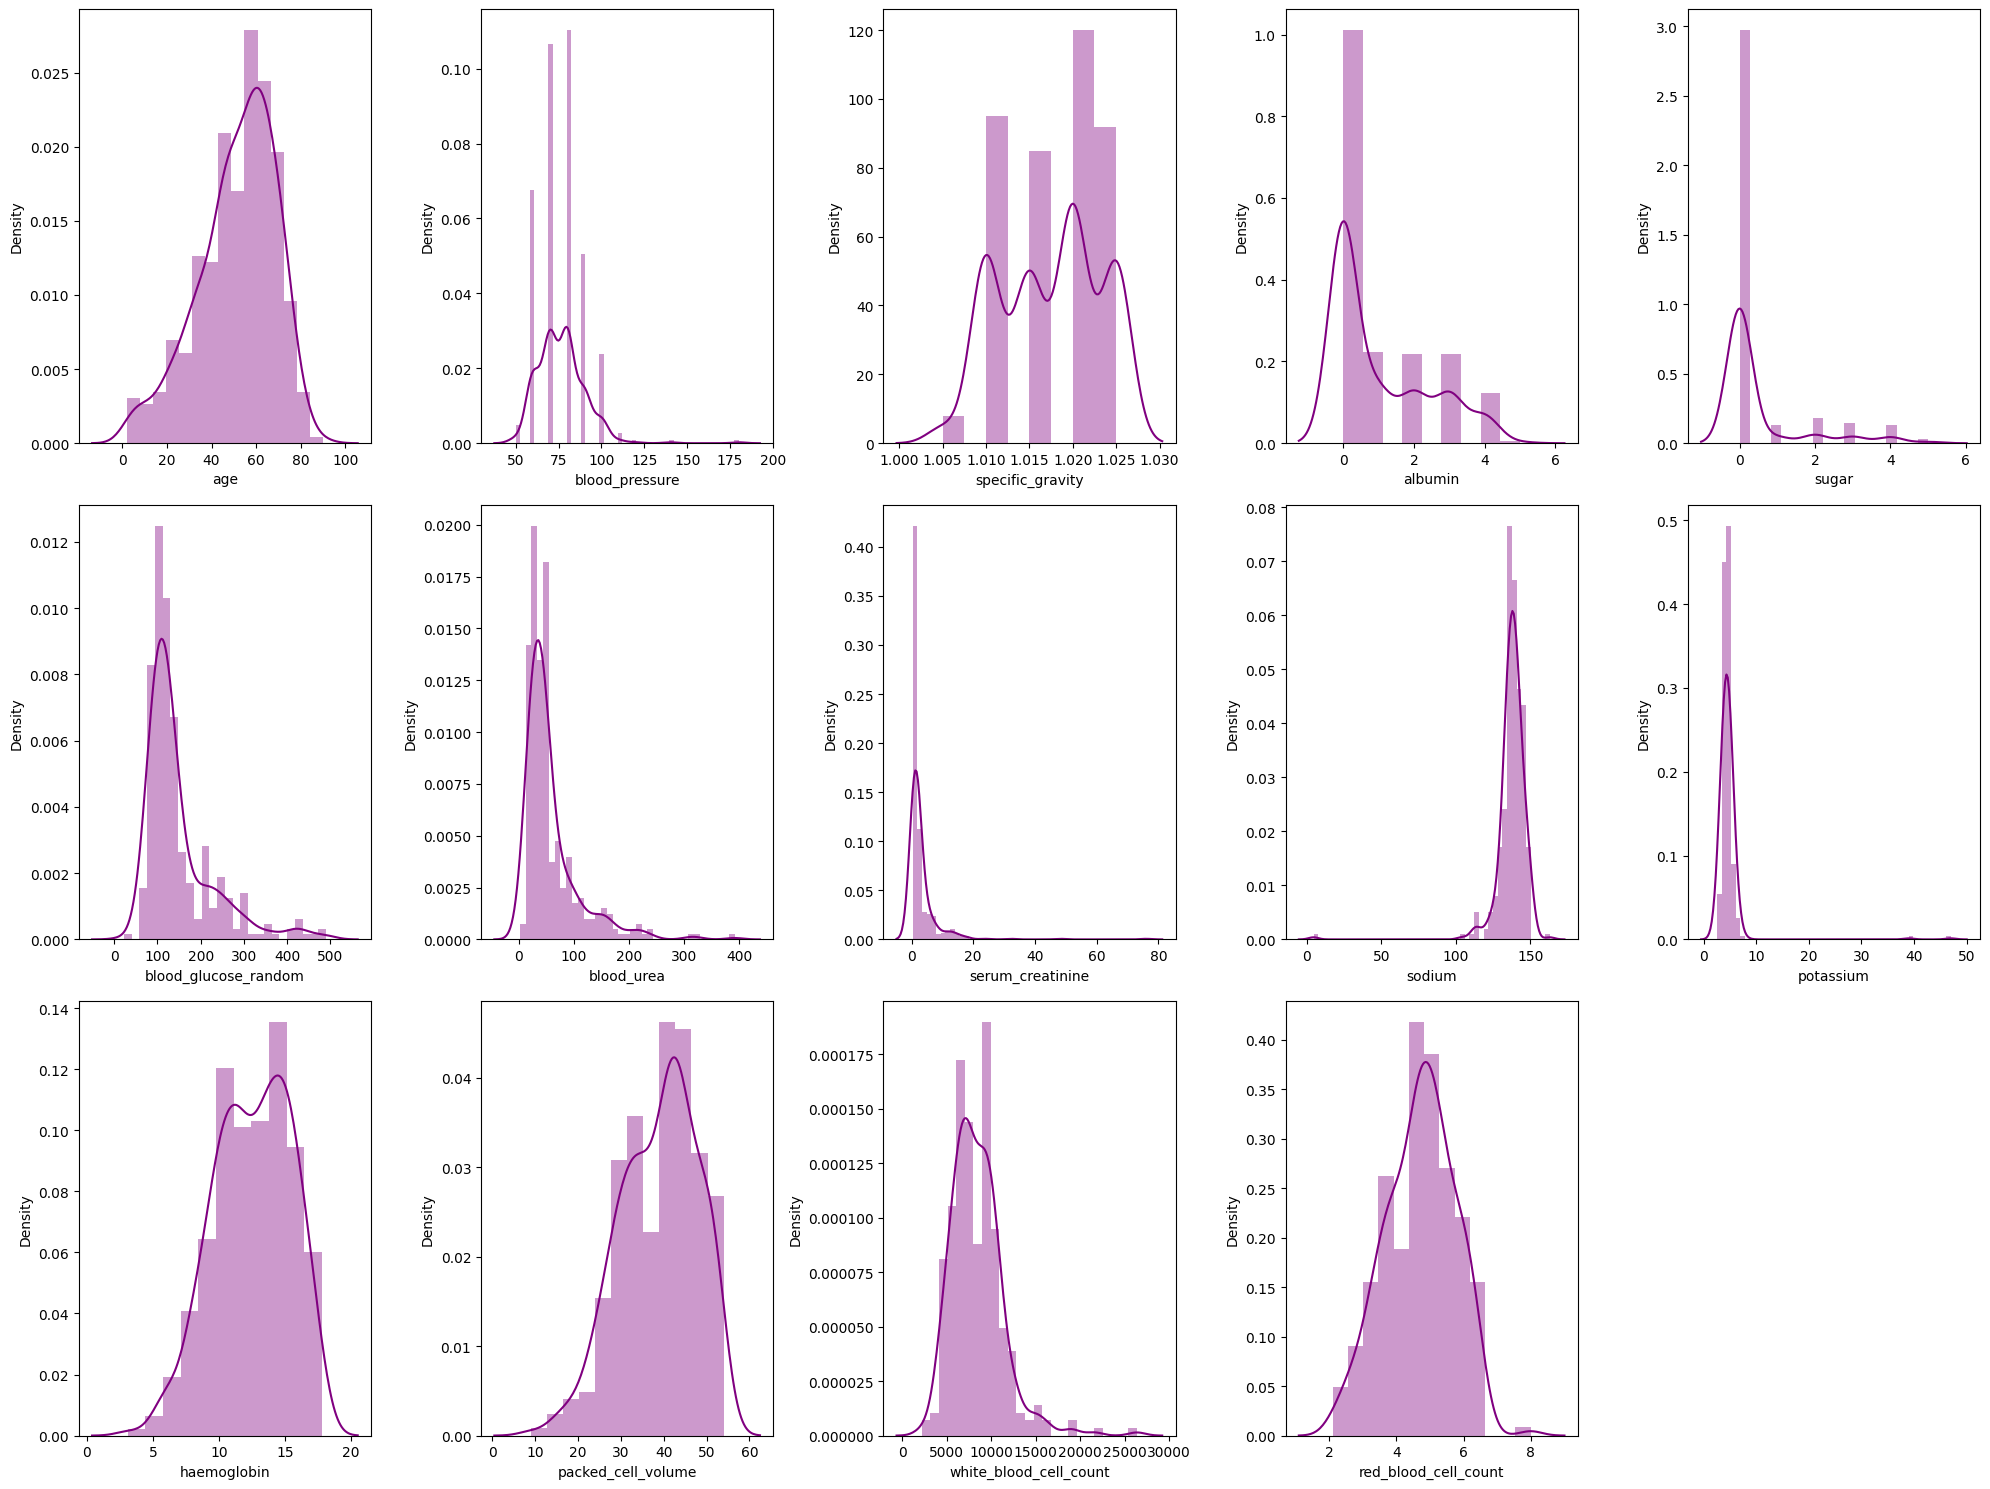

In [17]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sb.distplot(df[column], color='purple')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



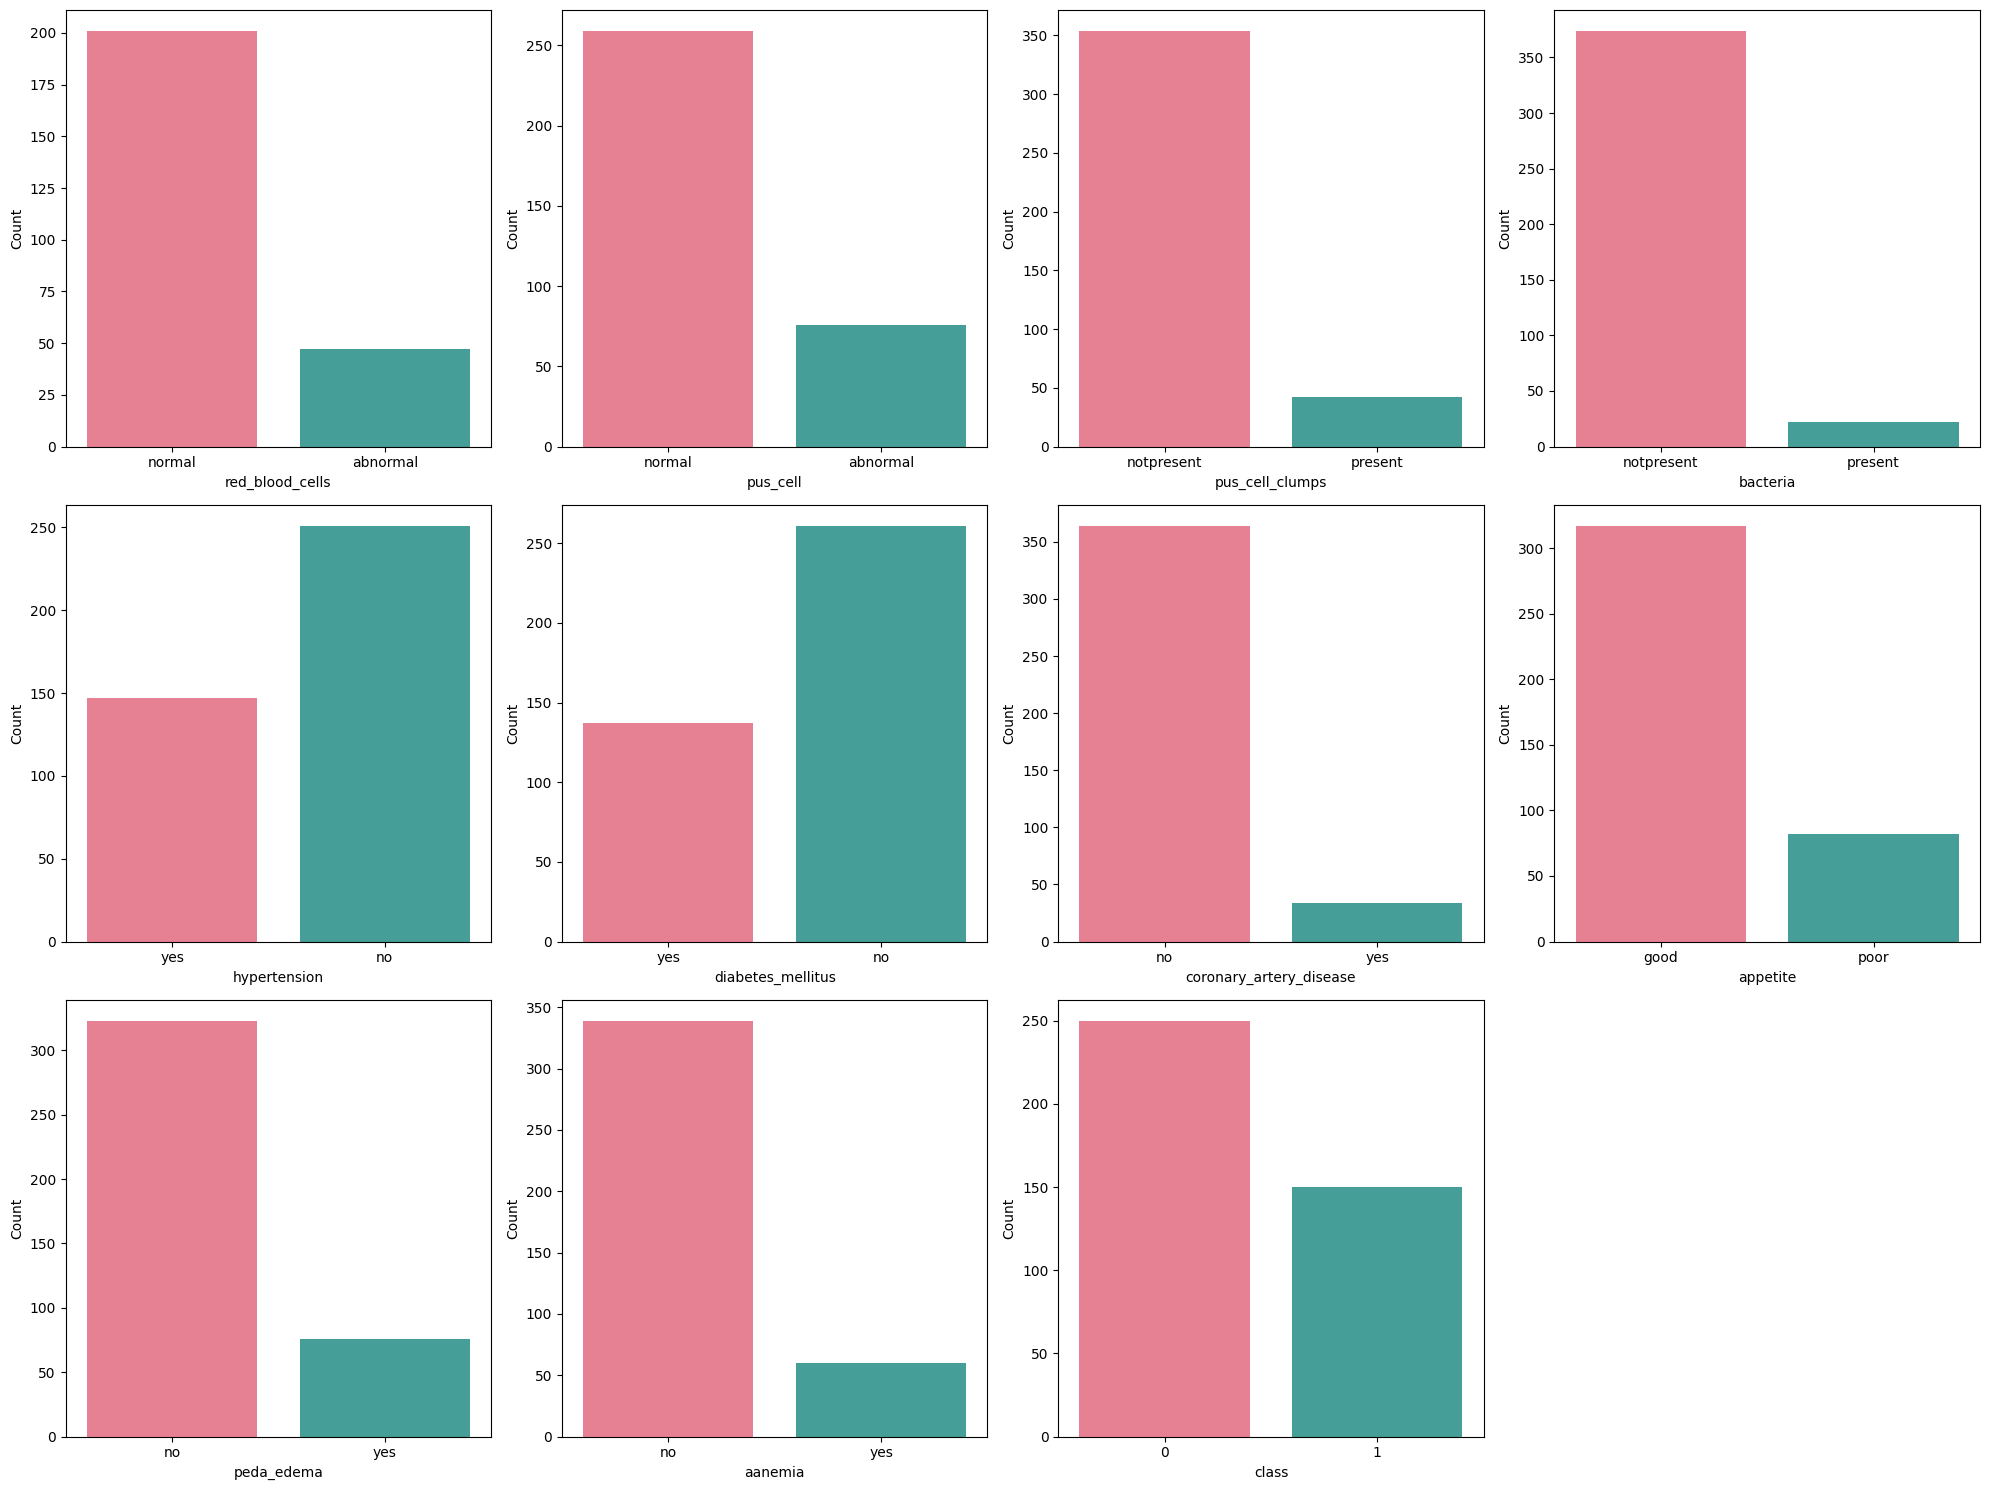

In [18]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)
    sb.countplot(data=df, x=column, palette='husl')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

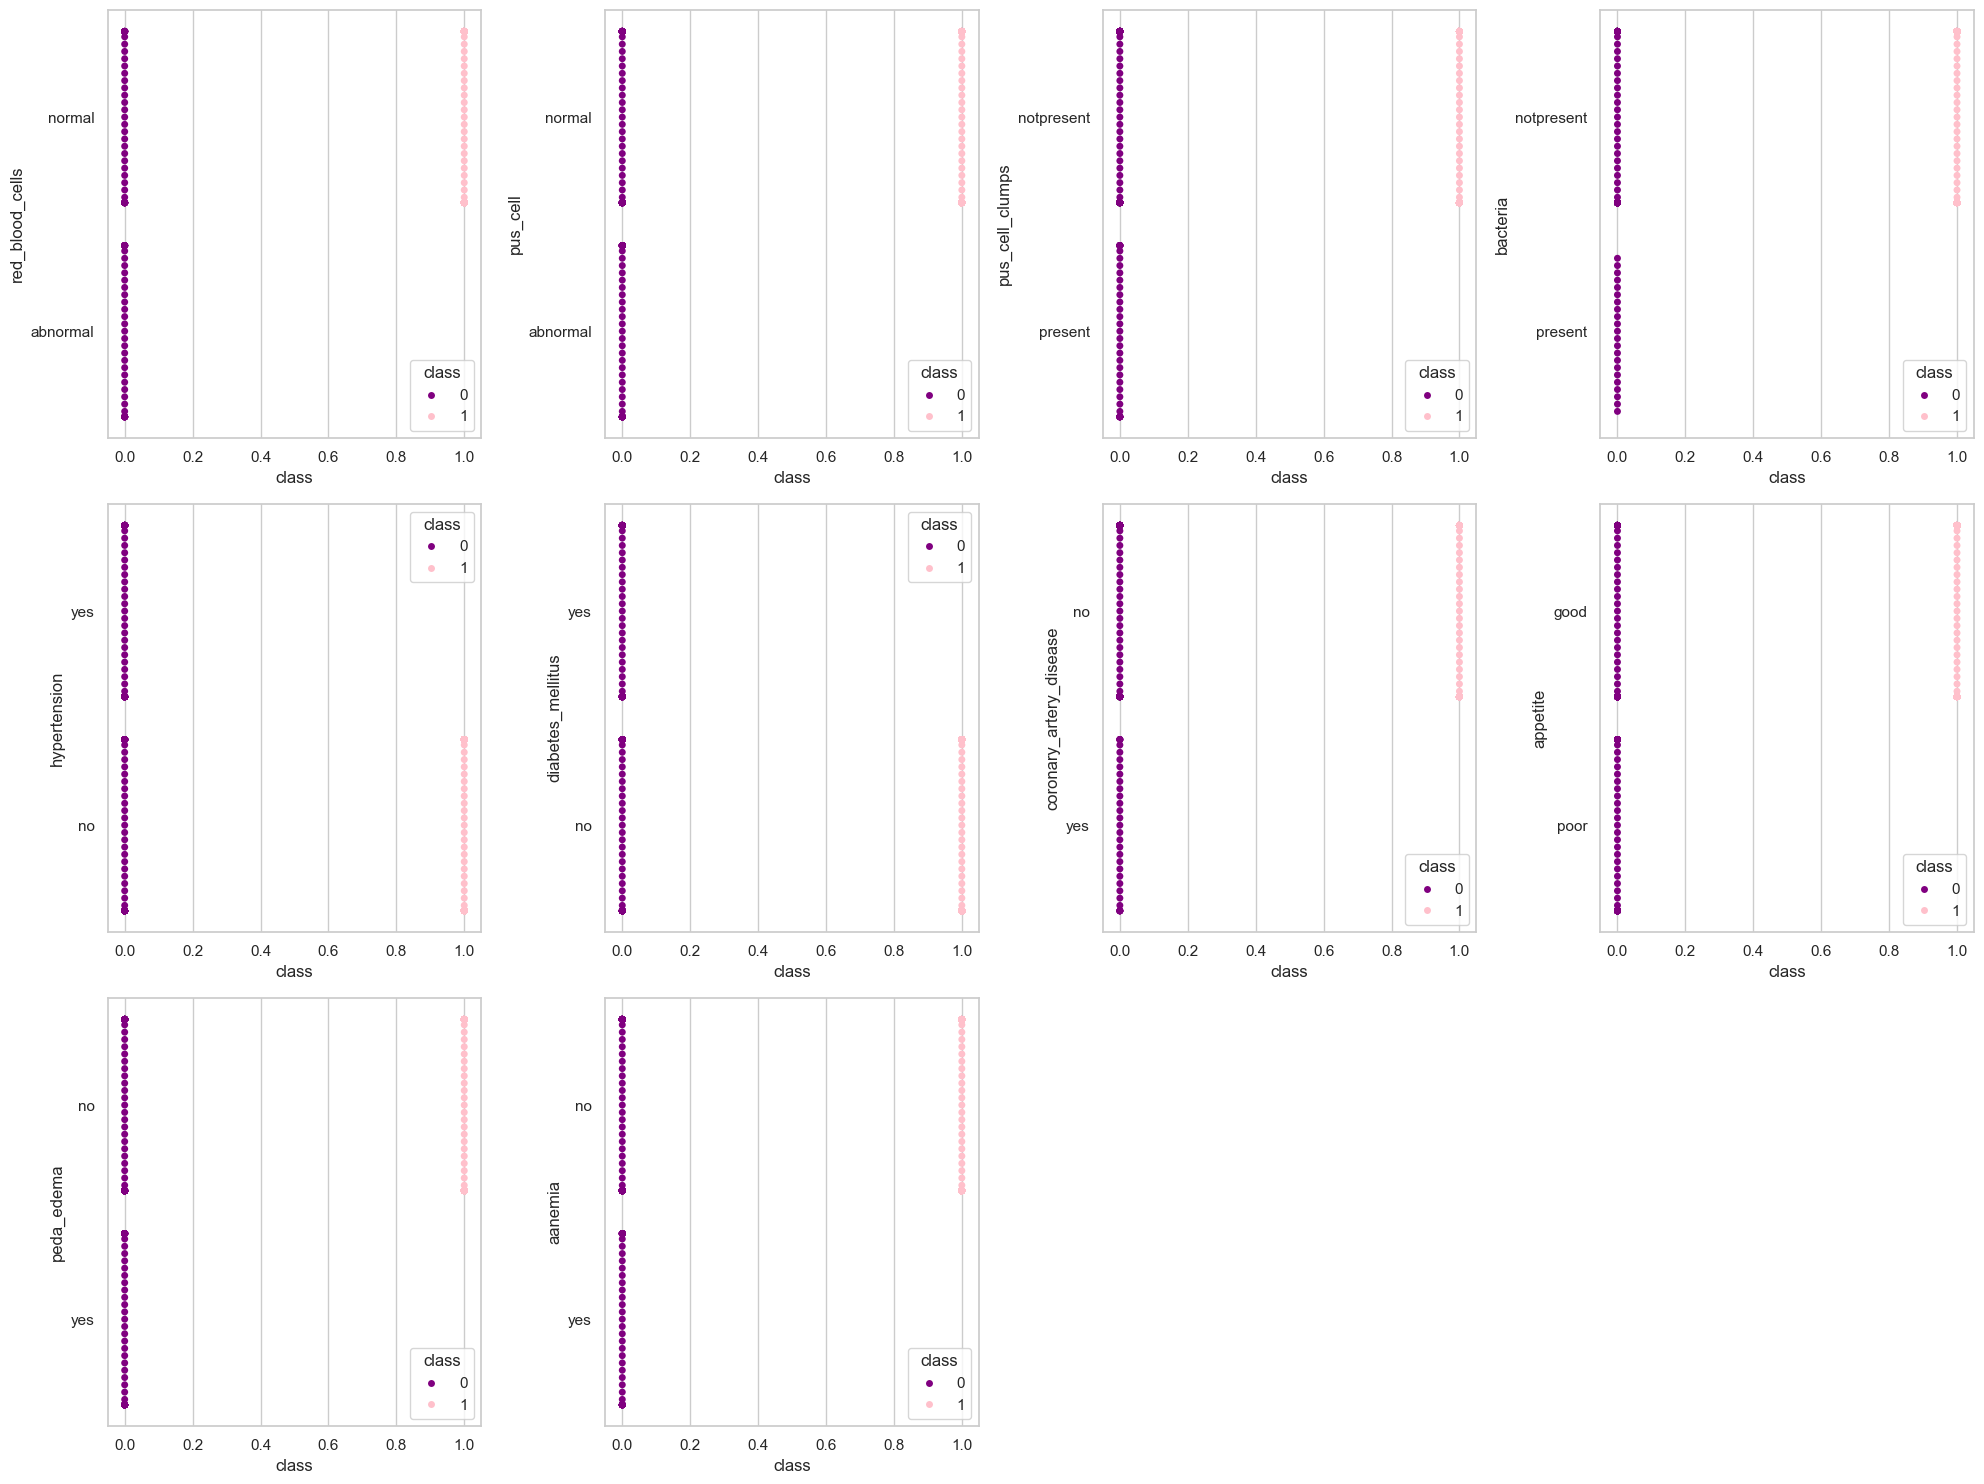

In [19]:
sb.set_theme(style="whitegrid", palette=["purple", "pink"])
cat_cols_except_class = cat_cols.copy()
cat_cols_except_class.remove('class')
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_cols_except_class, 1):
    plt.subplot(3, 4, i)
    sb.swarmplot(data=df, x="class", y=column, hue='class')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

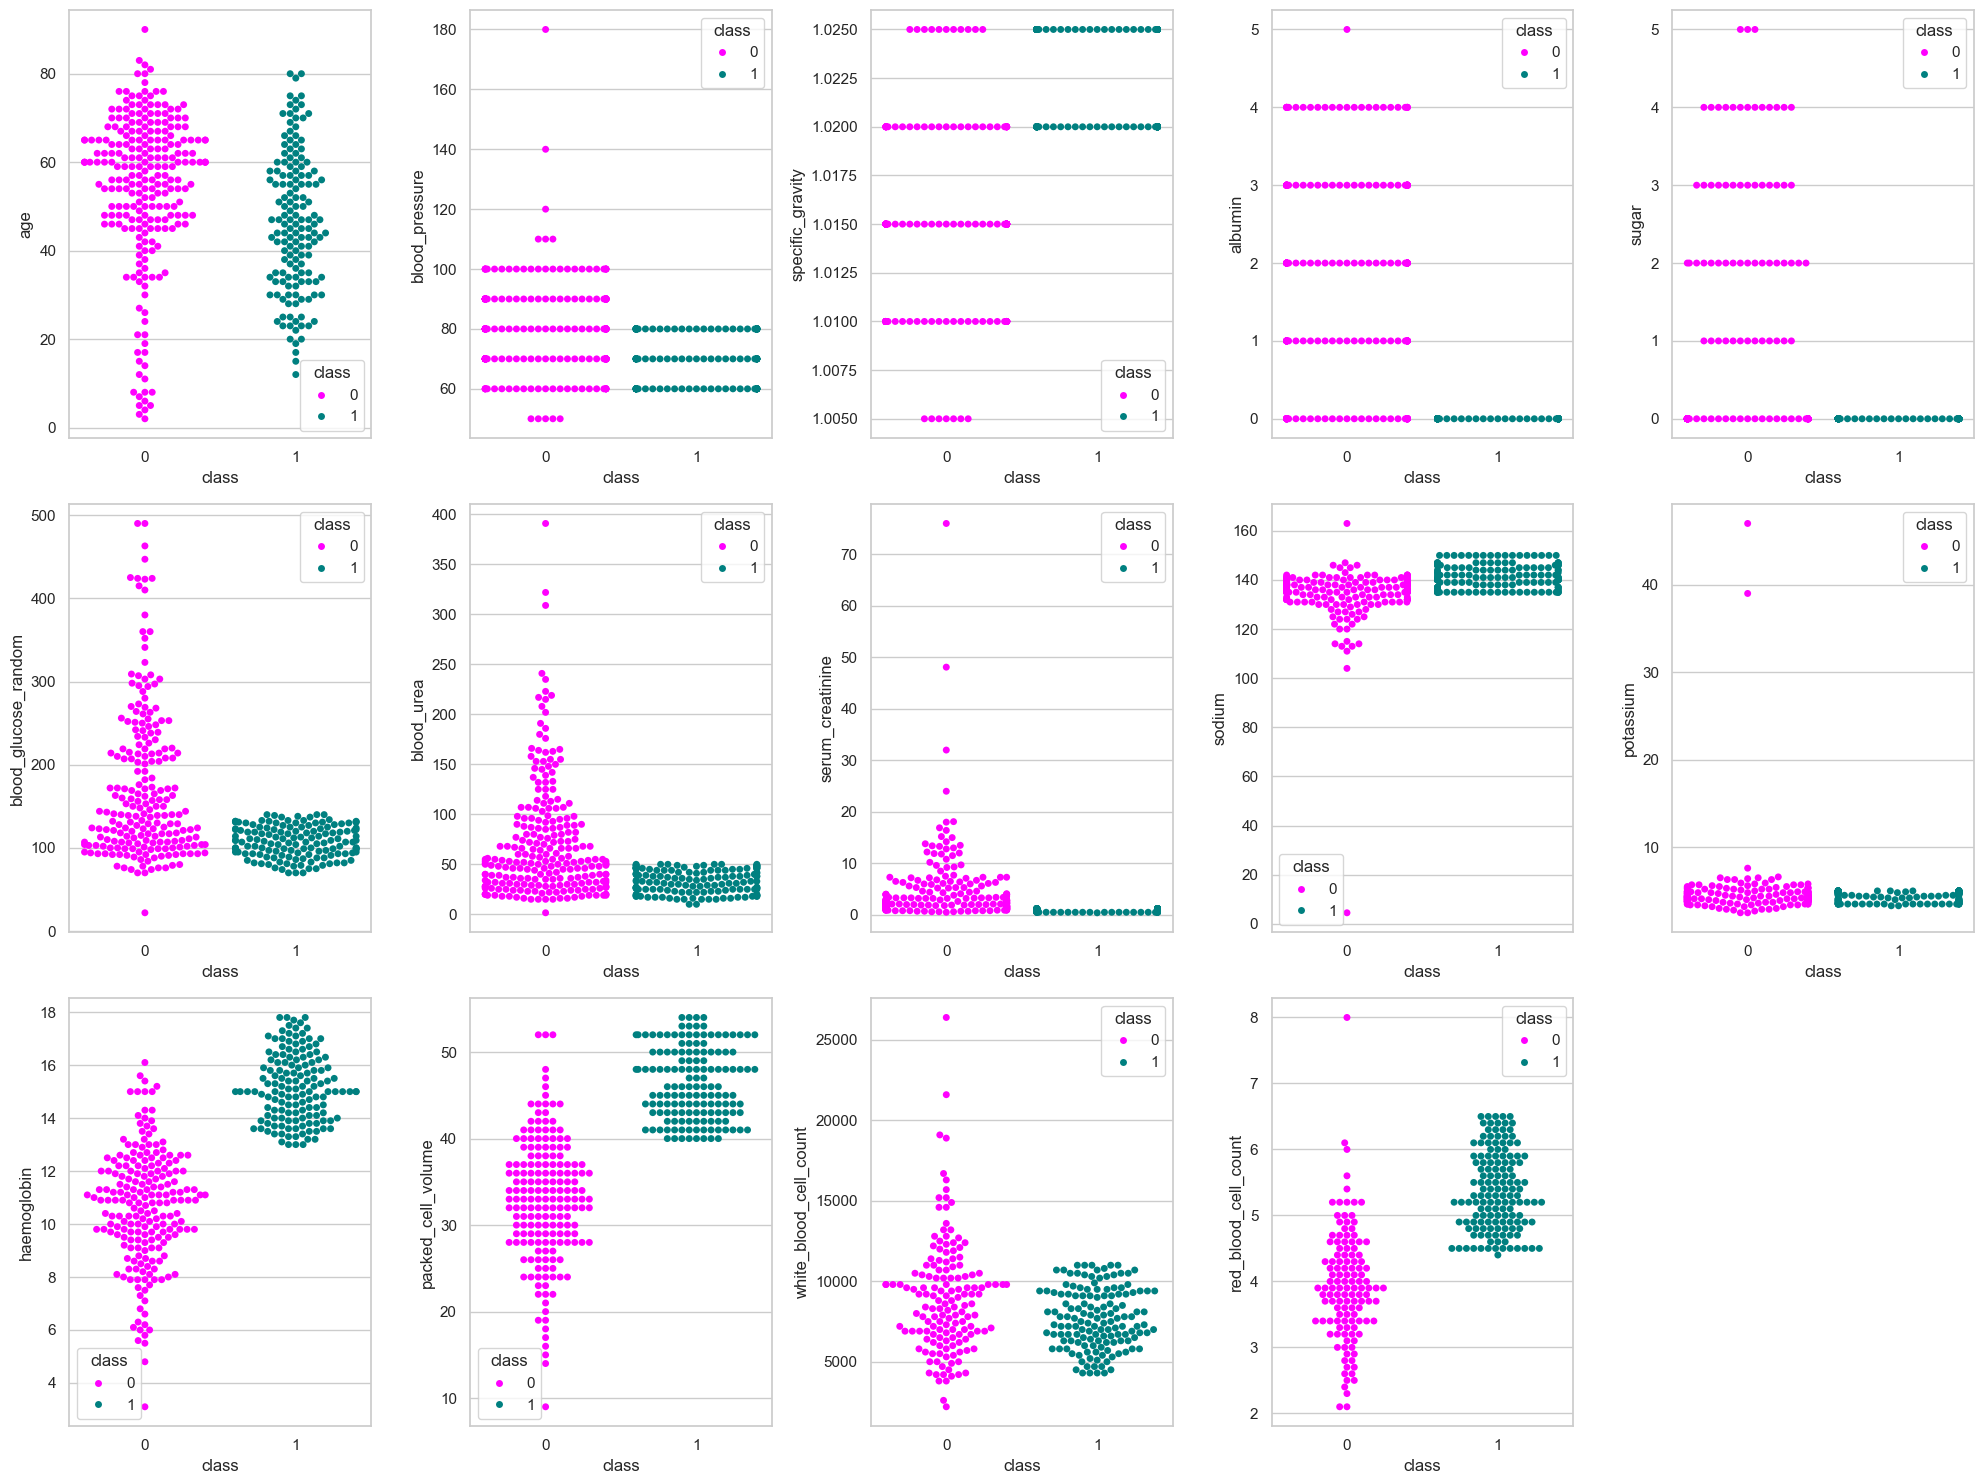

In [20]:
sb.set_theme(style="whitegrid", palette=["magenta", "teal"])

plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sb.swarmplot(data=df, x="class", y=column, hue='class')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [21]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [22]:
mean = df[num_cols].mean()
df[num_cols] = df[num_cols].fillna(mean)

In [23]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [24]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [25]:
mode_values = df[cat_cols].mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values) 

In [26]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [28]:
LabelEncoder = LabelEncoder()

for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [29]:
df.sample(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
303,55.0,70.0,1.02,0.0,0.0,1,1,0,0,107.0,...,50.0,6700.0,6.100000,0,0,0,0,0,0,1
359,74.0,60.0,1.02,0.0,0.0,1,1,0,0,88.0,...,53.0,6000.0,4.500000,0,0,0,0,0,0,1
155,50.0,70.0,1.02,3.0,0.0,0,1,1,1,123.0,...,36.0,4700.0,4.707435,0,0,0,0,0,0,0


In [30]:
y = df['class']
X = df.drop(['class'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

In [73]:
def custom_kernel(X, y):
    return np.dot(np.dot(X, X.T), np.dot(y, y.T))

clf = SVC(kernel=custom_kernel)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"""
Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred, average="weighted")}
Precision: {precision_score(y_test, y_pred, average="weighted")}
F1-score: {f1_score(y_test, y_pred, average="weighted")}
""")
print(confusion_matrix(y_test, y_pred))

X:                             370           79            99           316  \
age                        69.00     56.000000     56.000000    35.000000   
blood_pressure             70.00     80.000000    180.000000    76.469072   
specific_gravity            1.02      1.010000      1.017408     1.020000   
albumin                     0.00      1.000000      0.000000     0.000000   
sugar                       0.00      0.000000      4.000000     0.000000   
red_blood_cells             1.00      1.000000      1.000000     1.000000   
pus_cell                    1.00      1.000000      0.000000     1.000000   
pus_cell_clumps             0.00      0.000000      0.000000     0.000000   
bacteria                    0.00      0.000000      0.000000     0.000000   
blood_glucose_random       83.00    165.000000    298.000000    99.000000   
blood_urea                 42.00     55.000000     24.000000    30.000000   
serum_creatinine            1.20      1.800000      1.200000     0.500000 

In [65]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"""
Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred, average="weighted")}
Precision: {precision_score(y_test, y_pred, average="weighted")}
F1-score: {f1_score(y_test, y_pred, average="weighted")}
""")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80


Accuracy: 0.9875
Recall: 0.9875
Precision: 0.9877358490566038
F1-score: 0.9874458874458873

[[52  0]
 [ 1 27]]


In [66]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"""
Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred, average="weighted")}
Precision: {precision_score(y_test, y_pred, average="weighted")}
F1-score: {f1_score(y_test, y_pred, average="weighted")}
""")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80


Accuracy: 0.65
Recall: 0.65
Precision: 0.42250000000000004
F1-score: 0.5121212121212121

[[52  0]
 [28  0]]


In [67]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"""
Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred, average="weighted")}
Precision: {precision_score(y_test, y_pred, average="weighted")}
F1-score: {f1_score(y_test, y_pred, average="weighted")}
""")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80


Accuracy: 0.65
Recall: 0.65
Precision: 0.42250000000000004
F1-score: 0.5121212121212121

[[52  0]
 [28  0]]


In [68]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"""
Accuracy: {accuracy_score(y_test, y_pred)}
Recall: {recall_score(y_test, y_pred, average="weighted")}
Precision: {precision_score(y_test, y_pred, average="weighted")}
F1-score: {f1_score(y_test, y_pred, average="weighted")}
""")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.77      0.68        52
           1       0.20      0.11      0.14        28

    accuracy                           0.54        80
   macro avg       0.41      0.44      0.41        80
weighted avg       0.47      0.54      0.49        80


Accuracy: 0.5375
Recall: 0.5375
Precision: 0.47000000000000003
F1-score: 0.49328165374677

[[40 12]
 [25  3]]
